In [3]:
import random
from game import Game, Player, Move
import numpy as np
from copy import copy, deepcopy
from hashlib import sha1
from tqdm import tqdm
import matplotlib.pyplot as plt
import json
import concurrent.futures
import import_ipynb

In [4]:
from train_agent import Training_game, RandomPlayer

In [5]:
class MyPlayer(Player):
    def __init__(self, player_value: int) -> None:
        self.player_value = player_value
        with open('Q2_000_000.json', 'r') as file:
            self.Q_first = json.load(file)
        with open('Q2_000_000_second.json', 'r') as file:
            self.Q_second = json.load(file)


    def make_move(self, game: 'Game') -> tuple[tuple[int, int], Move]:
        best_move = None
        highest_eval = -np.inf
        moves = self.get_legal_moves(game.get_board())
        for move in moves:
            current_board = np.copy(game.get_board())
            new_game = Training_game()
            new_game.set_board(current_board)
            Q_table = self.Q_first if self.player_value == 0 else self.Q_second
            new_board, prev_pos = new_game.change_board(move, self.player_value)
            hashed_board_state = self.hash_board(new_board)
            table_result = Q_table.get(hashed_board_state)
            eval = 0 if table_result == None else table_result
            if (eval > highest_eval):
                highest_eval = eval
                best_move = move
        return best_move
    
    def get_legal_moves(self, board: np.ndarray):
        moves = list()
        rows, cols = board.shape
        for i in range(rows):
            if (board[i, 0] == -1):
                pickable_piece = (0,i)
                if (i == 0):
                    insertions = (Move.BOTTOM, Move.RIGHT)
                elif (i == 4):
                    insertions = (Move.TOP, Move.RIGHT)
                else:
                    insertions = (Move.TOP, Move.BOTTOM, Move.RIGHT)
                
                for insertion in insertions:
                    moves.append((pickable_piece, insertion))
            
            if (board[i, 4] == -1):
                pickable_piece = (4,i)
                if (i == 0):
                    insertions = (Move.BOTTOM, Move.LEFT)
                elif (i == 4):
                    insertions = [Move.TOP, Move.LEFT]
                else:
                    insertions = (Move.TOP, Move.BOTTOM, Move.LEFT)
                for insertion in insertions:
                    moves.append((pickable_piece, insertion))
        for j in range(cols):
            if(board[0, j] == self.player_value or board[0, j] == -1):
                pickable_piece = (j,0)
                if(j == 0):
                    insertions = (Move.BOTTOM, Move.RIGHT)
                elif (j == 4):
                    insertions = (Move.BOTTOM, Move.LEFT)
                else:
                    insertions = (Move.LEFT, Move.RIGHT, Move.BOTTOM)
                for insertion in insertions:
                    moves.append((pickable_piece, insertion))
            if(board[4, j] == self.player_value or board[4, j] == -1):
                pickable_piece = (j,4)
                if (j == 0):
                    insertions = (Move.TOP, Move.RIGHT)
                elif (j == 4):
                    insertions = (Move.TOP, Move.LEFT)
                else:
                    insertions = (Move.LEFT, Move.RIGHT, Move.TOP)
                for insertion in insertions:
                    moves.append((pickable_piece, insertion))
        return moves
        


    def hash_board(self, board):
        sha_hash = sha1()
        sha_hash.update(board.tobytes())
        return sha_hash.hexdigest()


In [6]:
trained_agent = MyPlayer(0)



In [10]:
random_opponent = RandomPlayer()
game = Game()
results_first = []
results_second = []

num_test_games = 1000

for _ in tqdm(range(num_test_games)):
    trained_agent.player_value = 0
    real_game = Game()
    result = real_game.play(trained_agent, random_opponent)
    results_first.append(result)

print(f"winrate going first: {results_first.count(trained_agent.player_value) / num_test_games}")

trained_agent.player_value = 1
for _ in tqdm(range(num_test_games)):
    real_game = Game()
    result = real_game.play(random_opponent, trained_agent)
    results_second.append(result)

print(f"winrate going first: {results_second.count(trained_agent.player_value) / num_test_games}")



100%|██████████| 1000/1000 [00:06<00:00, 149.90it/s]


winrate going first: 0.874


100%|██████████| 1000/1000 [00:05<00:00, 173.48it/s]

winrate going first: 0.816


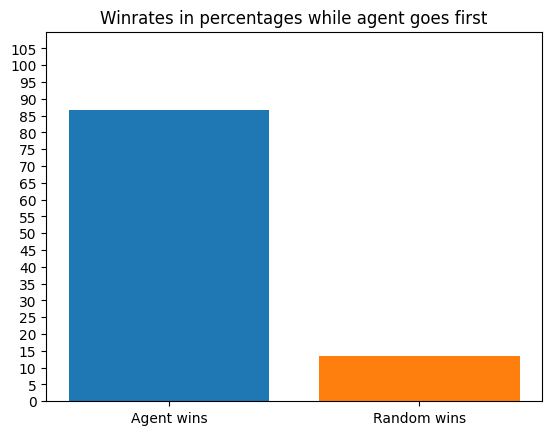

In [8]:
%matplotlib inline
plt.bar(["Agent wins"], [results_first.count(0) * 100 / num_test_games])
plt.bar(["Random wins"], [results_first.count(1) * 100/ num_test_games])
plt.title("Winrates in percentages while agent goes first")
plt.ylim(0,110)
plt.yticks(range(0, 110, 5))
plt.show();

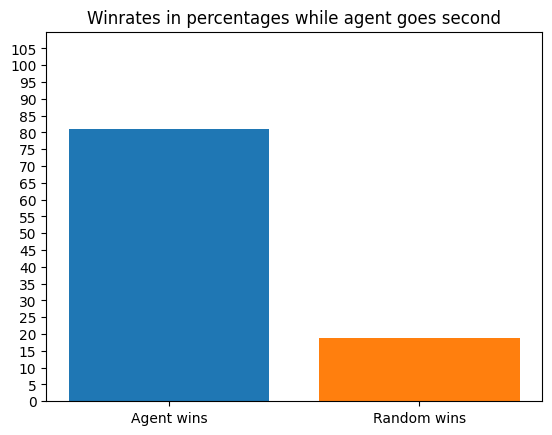

In [9]:
plt.bar(["Agent wins"], [results_second.count(1) * 100 / num_test_games])
plt.bar(["Random wins"], [results_second.count(0) * 100 / num_test_games])
plt.title("Winrates in percentages while agent goes second")
plt.ylim(0,110)
plt.yticks(range(0, 110, 5))
plt.show();